# Importing Libraries

In [44]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers

import warnings
warnings.filterwarnings('ignore')

In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

# Data Preprocessing

In [4]:
## Normalize the pixel value in each matrix

x_train = x_train / 255.0
x_test = x_test / 255.0

In [5]:
## Reshape 2D array to 4D tensor

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [6]:
## One hot encodding

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Model Building

In [9]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(x_train, y_train, epochs=10, batch_size=30, validation_data=(x_test, y_test))

Epoch 1/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8973 - loss: 0.3256 - val_accuracy: 0.9860 - val_loss: 0.0428
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.9836 - loss: 0.0529 - val_accuracy: 0.9894 - val_loss: 0.0342
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.9885 - loss: 0.0378 - val_accuracy: 0.9882 - val_loss: 0.0331
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.9911 - loss: 0.0275 - val_accuracy: 0.9917 - val_loss: 0.0275
Epoch 5/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9927 - loss: 0.0210 - val_accuracy: 0.9931 - val_loss: 0.0226
Epoch 6/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.9941 - loss: 0.0175 - val_accuracy: 0.9926 - val_loss: 0.0261
Epoch 7/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9958 - loss: 0.0137 - val_accuracy: 0.9921 - val_loss: 0.0242
Epoch 8/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9961 - loss:

In [19]:
model.history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

# Model Evaluation

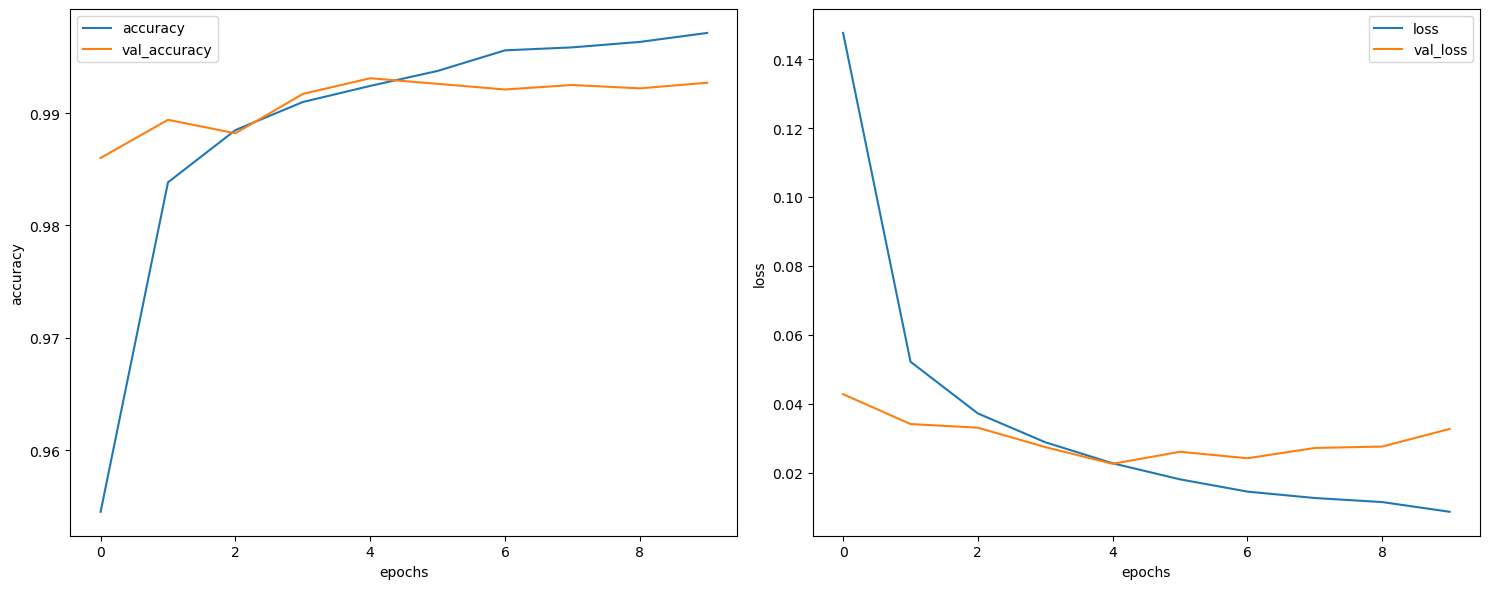

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(15,6))

axes[0].plot(model.history.history['accuracy'], label='accuracy')
axes[0].plot(model.history.history['val_accuracy'], label='val_accuracy')
axes[0].legend()
axes[0].set_xlabel('epochs')
axes[0].set_ylabel('accuracy')

axes[1].plot(model.history.history['loss'], label='loss')
axes[1].plot(model.history.history['val_loss'], label='val_loss')
axes[1].legend()
axes[1].set_xlabel('epochs')
axes[1].set_ylabel('loss')

plt.tight_layout()
plt.show()

In [42]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9909 - loss: 0.0361


In [43]:
print(f'Loss: {test_loss}')
print(f'Accuracy: {test_acc}')

Loss: 0.03272946923971176
Accuracy: 0.9926999807357788
